# MNIST Classification using MLP in TensorFlow

In [55]:
# imports
from tensorflow import keras
from sklearn.metrics import classification_report, multilabel_confusion_matrix

## Load Data

In [38]:
(xtr, ytr), (xt, yt) = keras.datasets.mnist.load_data()

Normalize

In [39]:
print("Before", xtr.shape)
xtr = xtr.reshape(-1, 28*28)
xt = xt.reshape(-1, 28*28)
print("After", xtr.shape)

Before (60000, 28, 28)
After (60000, 784)


One hot encoding

In [40]:
print("Before", ytr[0])
ytr = keras.utils.to_categorical(ytr, 10)
yt = keras.utils.to_categorical(yt, 10)
print("After", ytr[0])

Before 5
After [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Model Creation

In [41]:
model = keras.Sequential()
# print(model.__doc__)
model.add(keras.Input(shape=(28*28,)))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Visualization

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96
)

from IPython.display import Image
Image('model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


FileNotFoundError: No such file or directory: 'model.png'

FileNotFoundError: No such file or directory: 'model.png'

<IPython.core.display.Image object>

In [44]:
history = model.fit(
    xtr,
    ytr,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6632 - loss: 9.2508 - val_accuracy: 0.9205 - val_loss: 0.2807
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8641 - loss: 0.5483 - val_accuracy: 0.9417 - val_loss: 0.2062
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9083 - loss: 0.3420 - val_accuracy: 0.9525 - val_loss: 0.1695
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9247 - loss: 0.2703 - val_accuracy: 0.9542 - val_loss: 0.1576
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9352 - loss: 0.2260 - val_accuracy: 0.9624 - val_loss: 0.1355
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9462 - loss: 0.1853 - val_accuracy: 0.9634 - val_loss: 0.1392
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9514 - loss: 0.1723 - val_accuracy: 0.9647 - val_loss: 0.1300
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9569 - loss: 0.1536 - val_accuracy: 0

In [59]:
y_ = model.predict(xt)
# multilabel_confusion_matrix(yt, y_)
yt

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

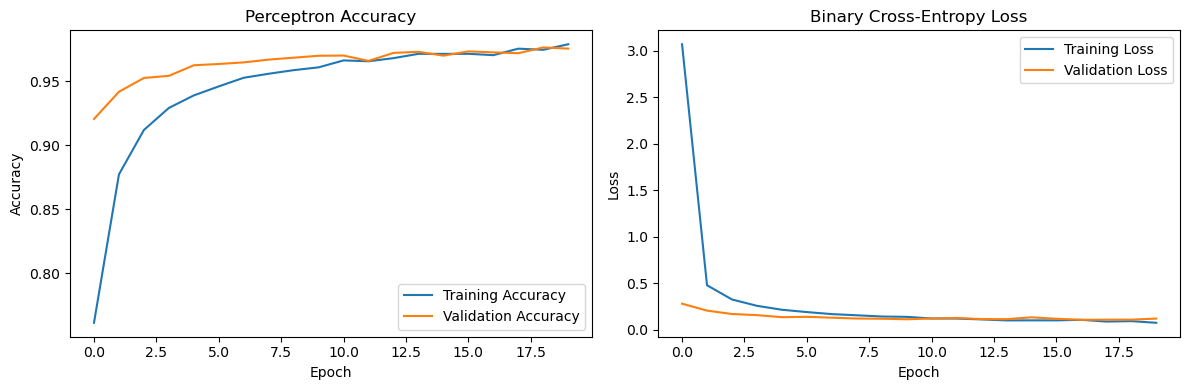

In [47]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Perceptron Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Binary Cross-Entropy Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(history)